In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
# For type1 and embeded font
from matplotlib import rc
plt.rcParams['ps.useafm'] = True
rc('font',**{'family':'sans-serif','sans-serif':['FreeSans']})
plt.rcParams['pdf.fonttype'] = 42

# Active learning

In [3]:
# read results
eval_path = "/home/xianglin/projects/DVI_data/active_learning/random/resnet18/feedback.xlsx"
df = pd.read_excel(eval_path, index_col=0, dtype={"task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
# df = df.rename(columns={"rate": "labeled ratio"})

## feedback

In [4]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df = df.rename(columns={"rate": "labeled ratio"})
df_eval = df[(df.task=="feedback")&(df.tolerance==0.0)]

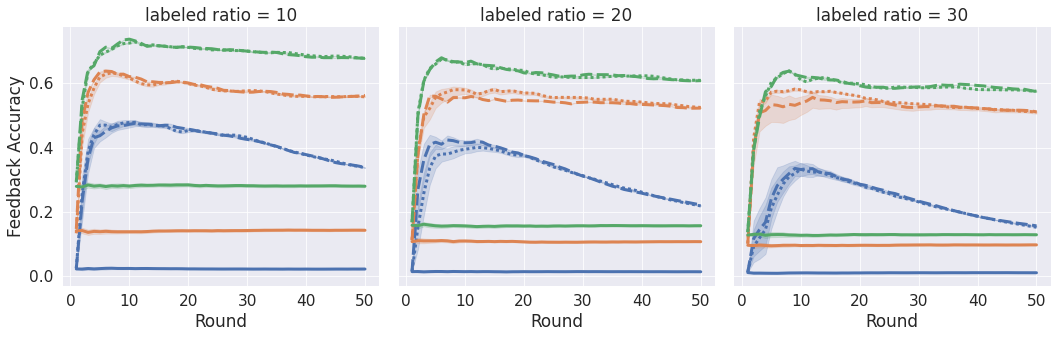

In [5]:
sns.set_theme()
sns.set_context("paper", font_scale=1.75, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="labeled ratio", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["Random", "DVI", "TimeVis"], kind="line", legend=False)
# sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='Round', ylabel='Feedback Accuracy')

fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_feedback.pdf",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)

## noise

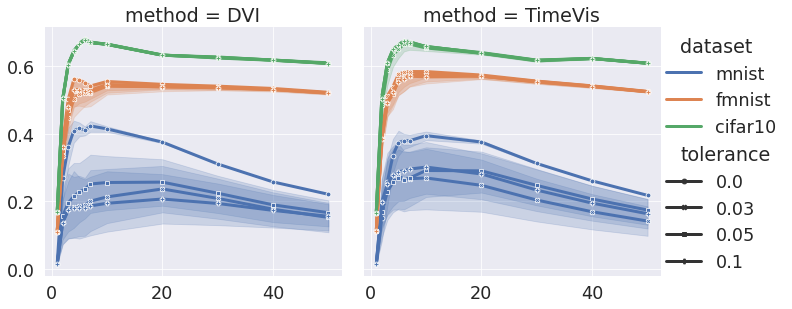

In [4]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.rate==20)&(df.tolerance<0.15)&(df.method!="Random")&(df.iter.isin([1,2,3,4,5,6,7,10,20,30,40,50]))]
pal20c = sns.color_palette('tab20c', 20)
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", markers=True, dashes=False, kind="line", legend="full")
# fg = sns.lineplot(data=df_eval, x="iter", y="eval", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["DVI", "TimeVis","Random"], legend="full")
# sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='', ylabel='')
fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_noise_20.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)

## efficiency
box plot

In [6]:
df_eval = df[(df.task=="efficiency")&((df.iter==10)|(df.iter==25)|(df.iter==50))]

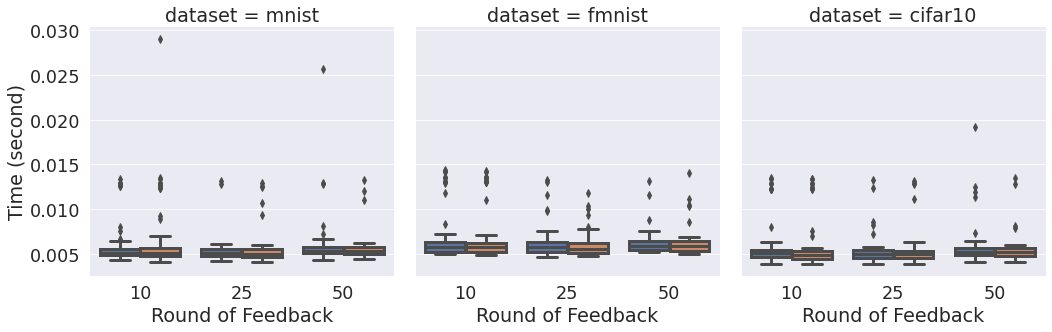

In [8]:
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.catplot(data=df_eval, x="iter", y="eval", col="dataset", hue="method", kind="box", legend=False)
# sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=1, title="Visualization Method", frameon=False)
fg.set(xlabel='Round of Feedback', ylabel='Time (second)')

fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_efficiency.pdf",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)

In [3]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_al_eval = df[(df.task=="feedback")&(df.tolerance<0.15)&(df.rate==30)]
df_al_eval["Task"] = ["Misprediction in the wild"]*len(df_al_eval)

/home/xianglin/miniconda3/envs/SV/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## FI: feature importance

In [15]:
df_eval = df[(df.task=="FI")&(df.dataset=="mnist")&(df.method=="DVI")&(df.rate==10)&(df.iter==1)]
df_eval.mean(axis=0).eval

/home/xianglin/miniconda3/envs/SV/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


0.8644489353449928

In [21]:
df_eval = df[(df.task=="FI")]
for dataset in ["mnist", "fmnist", "cifar10"]:
    for method in ["DVI", "TimeVis"]:
        for rate in [10, 20, 30]:
            for iter_ in [1,2,3,4]:
                eval = df_eval[(df.dataset==dataset)&(df.method==method)&(df.rate==rate)&(df.iter==iter_)].mean(axis=0).eval
                std = df_eval[(df.dataset==dataset)&(df.method==method)&(df.rate==rate)&(df.iter==iter_)].std(axis=0).eval
                print(dataset, method, rate, iter_, round(eval, 3), round(std, 3))

/home/xianglin/miniconda3/envs/SV/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/xianglin/miniconda3/envs/SV/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/home/xianglin/miniconda3/envs/SV/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/xianglin/miniconda3/envs/SV/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


mnist DVI 10 1 0.864 0.018
mnist DVI 10 2 -0.204 0.016
mnist DVI 10 3 0.572 0.037
mnist DVI 10 4 -0.044 0.086
mnist DVI 20 1 1.006 0.012
mnist DVI 20 2 0.135 0.035
mnist DVI 20 3 -0.064 0.021
mnist DVI 20 4 0.061 0.02
mnist DVI 30 1 1.012 0.005
mnist DVI 30 2 0.032 0.014
mnist DVI 30 3 -0.023 0.007
mnist DVI 30 4 0.308 0.013
mnist TimeVis 10 1 0.859 0.013
mnist TimeVis 10 2 -0.026 0.013
mnist TimeVis 10 3 0.12 0.011
mnist TimeVis 10 4 0.24 0.029
mnist TimeVis 20 1 1.022 0.005
mnist TimeVis 20 2 0.045 0.011
mnist TimeVis 20 3 0.087 0.014
mnist TimeVis 20 4 -0.078 0.011
mnist TimeVis 30 1 1.032 0.002
mnist TimeVis 30 2 -0.009 0.003
mnist TimeVis 30 3 0.004 0.003
mnist TimeVis 30 4 0.242 0.016
fmnist DVI 10 1 0.917 0.038
fmnist DVI 10 2 0.441 0.021
fmnist DVI 10 3 0.014 0.055
fmnist DVI 10 4 0.492 0.034
fmnist DVI 20 1 0.565 0.056
fmnist DVI 20 2 0.664 0.039
fmnist DVI 20 3 0.072 0.047
fmnist DVI 20 4 -0.114 0.028
fmnist DVI 30 1 0.504 0.026
fmnist DVI 30 2 0.485 0.043
fmnist DVI 30 3 0.3

# NOISE

In [9]:
# read results
eval_path = "/home/xianglin/projects/DVI_data/noisy/symmetric/feedback.xlsx"
df = pd.read_excel(eval_path, index_col=0, dtype={"task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
# df = df.rename(columns={"rate": "noise rate"})

## Feedback

In [5]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float
df = df.rename(columns={"rate": "noise rate"})
df_eval = df[(df.task=="feedback")&(df.tolerance==0.0)]

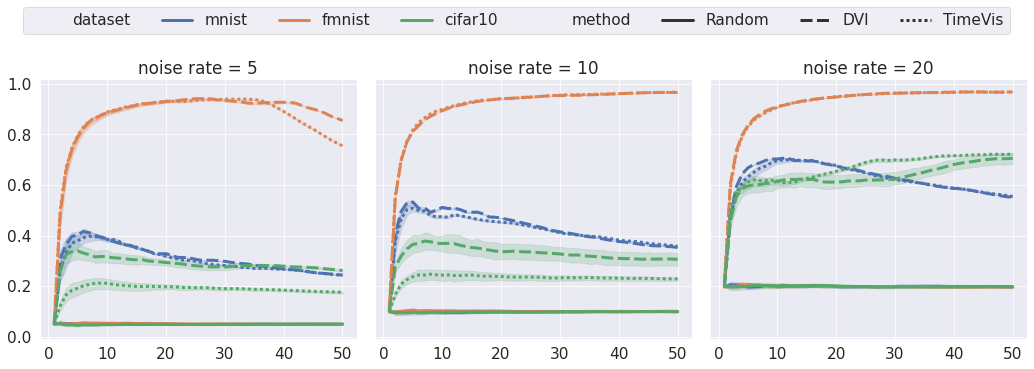

In [7]:
from matplotlib import rc
plt.rcParams['ps.useafm'] = True
rc('font',**{'family':'sans-serif','sans-serif':['FreeSans']})
plt.rcParams['pdf.fonttype'] = 42

# pal20c = sns.color_palette('tab20c', 20)
sns.set_theme()
sns.set_context("paper", font_scale=1.75, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="noise rate", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["Random", "DVI", "TimeVis"], kind="line", legend="auto")
# fg = sns.lineplot(data=df_eval, x="iter", y="eval", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["Random", "DVI", "TimeVis"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.465, 1), ncol=8, title=None, frameon=True)
fg.set(xlabel='', ylabel='')

fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_feedback.pdf",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)

## FI: feature importance

In [25]:
df_eval = df[(df.task=="FI")]
for dataset in ["mnist", "fmnist", "cifar10"]:
    for method in ["DVI", "TimeVis"]:
        for rate in [5, 10, 20]:
            for iter_ in [1,2,3,4]:
                eval = df_eval[(df.dataset==dataset)&(df.method==method)&(df.rate==rate)&(df.iter==iter_)].mean(axis=0).eval
                std = df_eval[(df.dataset==dataset)&(df.method==method)&(df.rate==rate)&(df.iter==iter_)].std(axis=0).eval
                # print(dataset, method, rate, iter_, round(eval, 3), round(std, 3))
                print(dataset, method, rate, iter_, round(eval, 3))

/home/xianglin/miniconda3/envs/SV/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/xianglin/miniconda3/envs/SV/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/home/xianglin/miniconda3/envs/SV/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/xianglin/miniconda3/envs/SV/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


mnist DVI 5 1 0.894
mnist DVI 5 2 -0.039
mnist DVI 5 3 0.004
mnist DVI 5 4 0.053
mnist DVI 10 1 0.875
mnist DVI 10 2 0.442
mnist DVI 10 3 0.315
mnist DVI 10 4 0.546
mnist DVI 20 1 1.051
mnist DVI 20 2 0.582
mnist DVI 20 3 0.583
mnist DVI 20 4 0.066
mnist TimeVis 5 1 0.891
mnist TimeVis 5 2 0.03
mnist TimeVis 5 3 -0.07
mnist TimeVis 5 4 0.041
mnist TimeVis 10 1 0.829
mnist TimeVis 10 2 -0.319
mnist TimeVis 10 3 0.323
mnist TimeVis 10 4 0.304
mnist TimeVis 20 1 1.034
mnist TimeVis 20 2 -0.324
mnist TimeVis 20 3 0.583
mnist TimeVis 20 4 -0.229
fmnist DVI 5 1 0.417
fmnist DVI 5 2 0.746
fmnist DVI 5 3 -0.146
fmnist DVI 5 4 1.658
fmnist DVI 10 1 0.159
fmnist DVI 10 2 0.856
fmnist DVI 10 3 0.303
fmnist DVI 10 4 1.189
fmnist DVI 20 1 0.757
fmnist DVI 20 2 0.13
fmnist DVI 20 3 0.145
fmnist DVI 20 4 0.614
fmnist TimeVis 5 1 0.72
fmnist TimeVis 5 2 1.306
fmnist TimeVis 5 3 0.564
fmnist TimeVis 5 4 1.398
fmnist TimeVis 10 1 0.151
fmnist TimeVis 10 2 0.42
fmnist TimeVis 10 3 0.481
fmnist TimeVis 10

## efficiency

In [10]:
# # "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float
df_eval = df[(df.task=="efficiency")&((df.iter==10)|(df.iter==25)|(df.iter==50))&(df.method!="Random")]

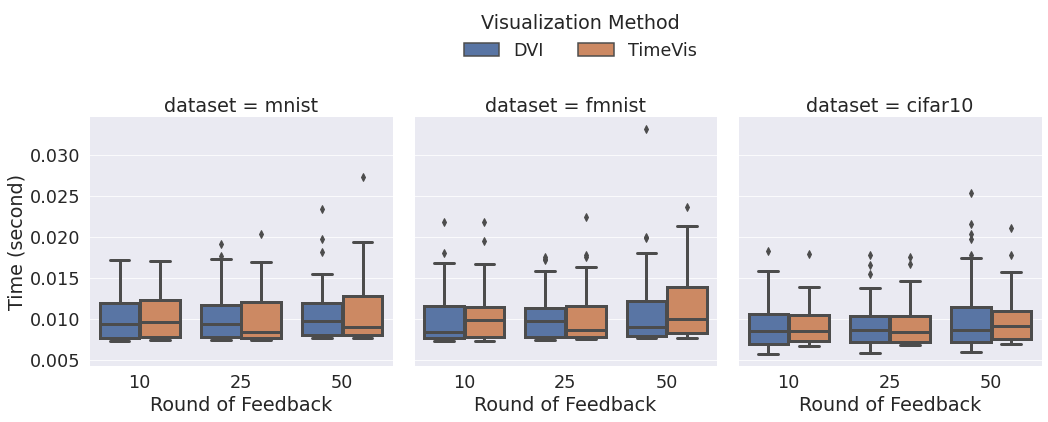

In [11]:
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.catplot(data=df_eval, x="iter", y="eval", col="dataset", hue="method", kind="box")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title="Visualization Method", frameon=False)
fg.set(xlabel='Round of Feedback', ylabel='Time (second)')

fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_efficiency.pdf",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    # transparent=True,
)

## noise

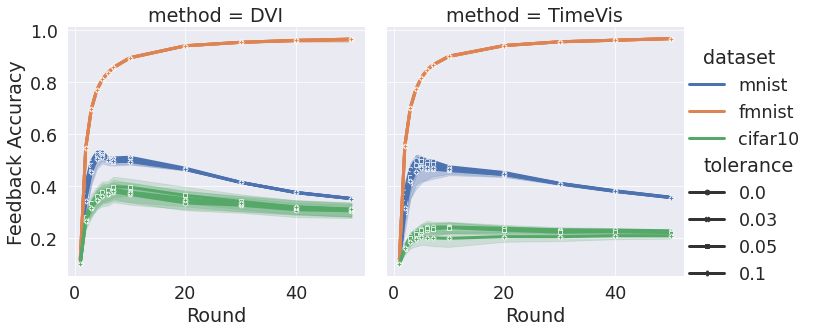

In [8]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.rate==10)&(df.tolerance<0.15)&(df.method!="Random")&(df.iter.isin([1,2,3,4,5,6,7,10,20,30,40,50]))]
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", dashes=False, markers=True, kind="line", legend="auto")
# sns.move_legend(fg, "center right", bbox_to_anchor=(0.8,1), ncol=9, title=None, frameon=True)
fg.set(xlabel='Round', ylabel='Feedback Accuracy')
fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_noise_10.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)

# Noise merge

In [3]:
eval_path = "/home/xianglin/projects/DVI_data/noisy/symmetric/feedback.xlsx"
df = pd.read_excel(eval_path, index_col=0, dtype={"task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
# df = df.rename(columns={"rate": "noise rate"})

In [4]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float
df_noise_eval = df[(df.task=="feedback")&(df.tolerance<0.15)&(df.rate==20)]
df_noise_eval["Task"] = ["Noisy samples"]*len(df_noise_eval)

/home/xianglin/miniconda3/envs/SV/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
eval_path = "/home/xianglin/projects/DVI_data/active_learning/random/resnet18/feedback.xlsx"
df = pd.read_excel(eval_path, index_col=0, dtype={"task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
# df = df.rename(columns={"rate": "labeled ratio"})

In [6]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float
df_al_eval = df[(df.task=="feedback")&(df.tolerance<0.15)&(df.rate==30)]
df_al_eval["Task"] = ["Misprediction in the wild"]*len(df_al_eval)

/home/xianglin/miniconda3/envs/SV/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df_eval = df_al_eval.append(df_noise_eval, ignore_index=True)
df_eval = df_eval[df_eval.method!="Random"]
df_eval = df_eval[df_eval.iter.isin([1,2,3,4,5,6,7,10,20,30,40,50])]

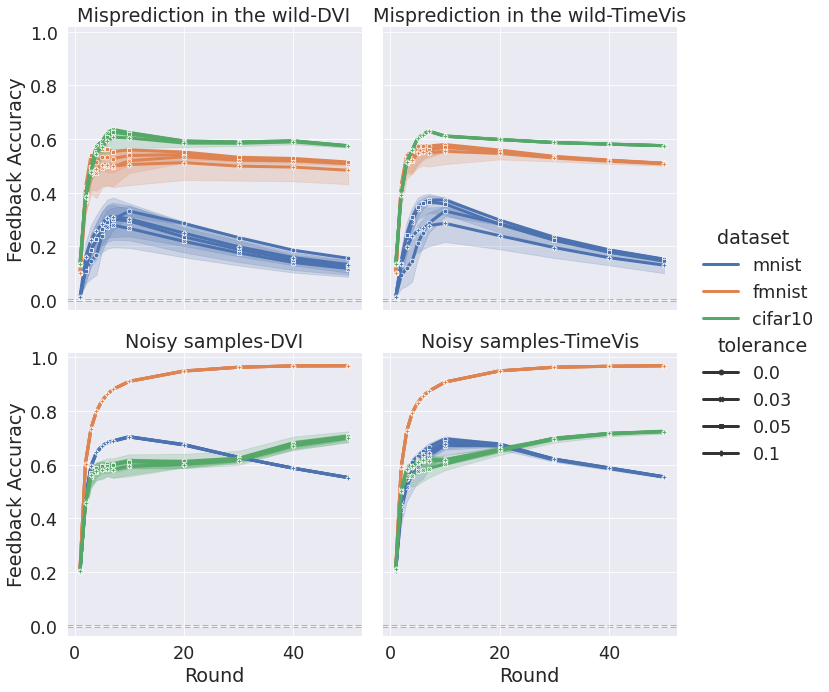

In [8]:
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval",row="Task", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", markers=True, dashes=False, kind="line", legend="auto")
# sns.move_legend(fg,"" frameon=True)
# sns.move_legend(fg, "center right")
fg.set(xlabel='Round', ylabel='Feedback Accuracy')
(fg.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
  .set_titles("{row_name}-{col_name}")
  )
fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation.pdf",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
)